In [63]:
import pandas as pd
import regex as re
from dateutil.parser import parse


In [58]:
def get_weekday(date_str):
    match = re.search(r'(\bJan\b|\bFeb\b|\bMar\b|\bApr\b|\bMay\b|\bJun\b|\bJul\b|\bAug\b|\bSep\b|\bOct\b|\bNov\b|\bDec\b)\s+\d{1,2},\s+\d{4}', date_str)
    if match:
        date_part = match.group()
        weekday = parse(date_part, fuzzy=True).weekday()
        return weekday
    else:
        return None


In [ ]:
def compute_aai()

# Conditions Observations

#### Observations of the Observations

<br> 1) Biased toward weekdays - probably also biases the AAI
<br> 2) Conditions reports currently don't have a structured field indicating difficulty or risk level (e.g. highest slope angle) of the tour.  This would be informative, in lieu of a full gpx upload that would be even better.  Can it be added next year?

#### Questions
<br> 1) Should we try to correct for reporting bias in the AAI?  Do hindcasters already have an intuition for this bias and build it into their assessment of actual hazard, assuming they see the day of week?
<br> 2) Does avalanche alley consistently add their obs to FAC website?  If not, should we also pursue that data source?
<br> 3) **important** -- is it worth gathering all the privately submitted observations too?  What's the volume there?
<br> 4) Is it worth showing hindcasters the obs and avalanche reports not only the day they're hindcasting, but also the full following week (or time period through the next weekend).  Since there might be reports of avalanches that don't come in till the weekend, even if the slides occured earlier.
<br> 4) Could we also scrape obs data from other forecasting centers like NWAC?  Might help get a larger sample size in determining observation bias

In [64]:
dfc = pd.read_csv('../data/fac_obs_2022_2023.csv')
dfc = pd.concat([dfc, pd.read_csv('../data/fac_obs_2023_2024.csv')])
dfc = dfc[[col for col in dfc.columns if 'Unnamed' not in col]]
dfc.columns = [col.lower().replace(' ','_') for col in dfc.columns]
dfc.head()
dfc = dfc[dfc.observation_date.notnull()]
dfc['weekday'] = dfc['observation_date'].apply(lambda x: get_weekday(x))
dfc[dfc.observer_type=='public']['weekday'].value_counts()

weekday
5    164
6    138
4     84
1     61
2     59
0     58
3     54
Name: count, dtype: int64

In [65]:
dfc[['observer_type']].value_counts()

observer_type
public           618
forecaster       235
professional      59
Name: count, dtype: int64

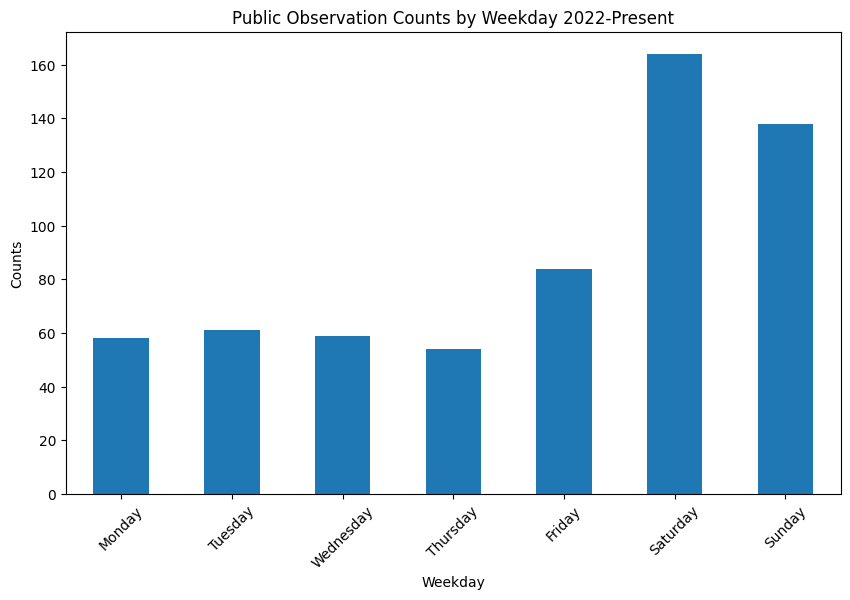

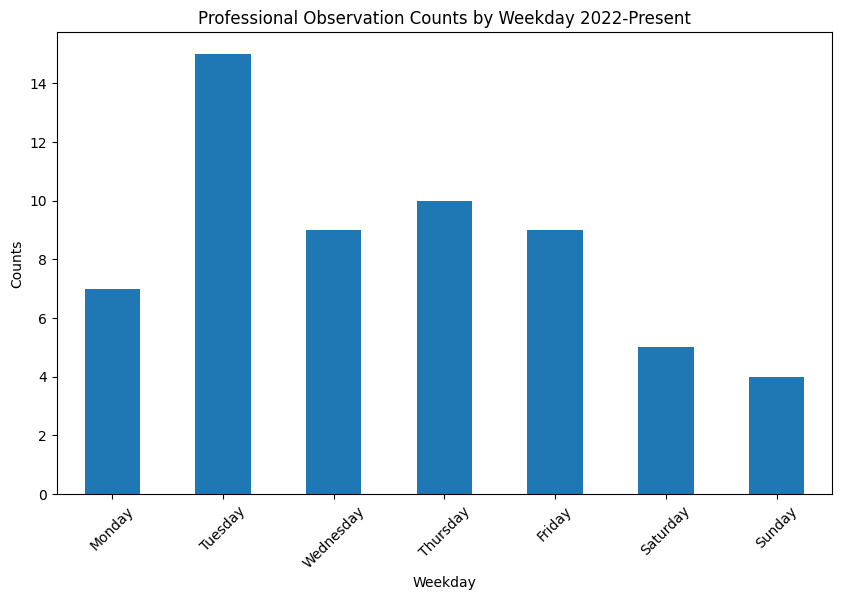

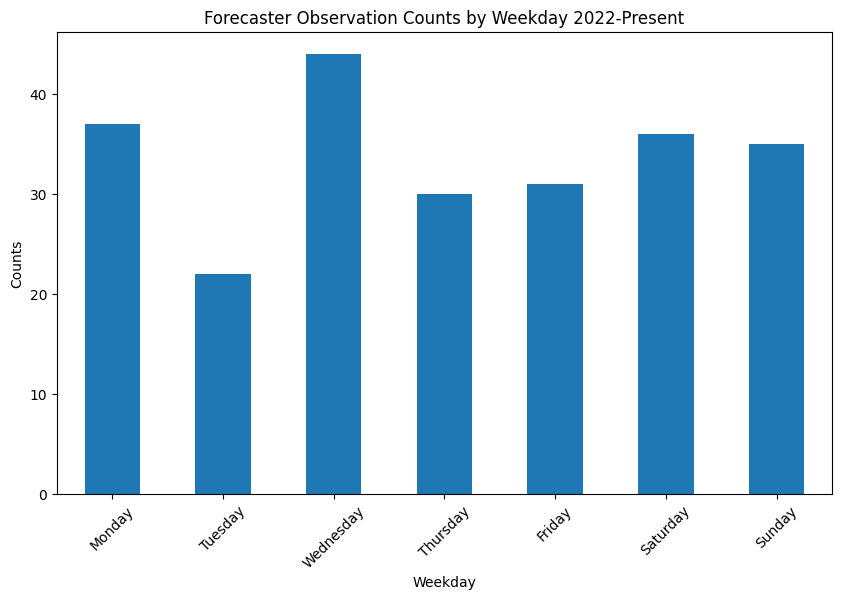

In [66]:
day_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 
           4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
dfc['weekday_str'] = dfc['weekday'].map(day_map)

for observer_type in ['Public','Professional','Forecaster']:
    weekday_counts = dfc[dfc['observer_type'] == observer_type.lower()]['weekday_str'].value_counts()
    weekday_counts = weekday_counts.reindex(['Monday', 'Tuesday', 'Wednesday', 
                                             'Thursday', 'Friday', 'Saturday', 'Sunday'])

    # Plotting
    plt.figure(figsize=(10, 6))
    weekday_counts.plot(kind='bar')
    plt.title(f'{observer_type} Observation Counts by Weekday 2022-Present')
    plt.xlabel('Weekday')
    plt.ylabel('Counts')
    plt.xticks(rotation=45)
    plt.show()

## Using exported obs

In [3]:
import pandas as pd
df_obs = pd.read_csv('../data/FAC_ob_export_2023-2024.csv')
df_obs.columns


Index(['id', 'lastUpdated', 'startDate', 'status', 'private', 'locationName',
       'locationPoint.lat', 'locationPoint.lng', 'obsSource', 'name',
       'observerType', 'organization', 'activity', 'instability.cracking',
       'instability.collapsing', 'instability.avalanches_caught',
       'instability.avalanches_observed', 'instability.avalanches_triggered',
       'instability.cracking_description',
       'instability.collapsing_description', 'advancedFields.timeInField.end',
       'advancedFields.timeInField.start', 'internalReporting', 'zone',
       'internalReporting.partner.name', 'internalReporting.partner.type'],
      dtype='object')

In [8]:
pd.set_option('display.max_columns', None)
df_obs[df_obs.name=='GNPG']#.name.value_counts()

,id,lastUpdated,startDate,status,private,locationName,locationPoint.lat,locationPoint.lng,obsSource,name,observerType,organization,activity,instability.cracking,instability.collapsing,instability.avalanches_caught,instability.avalanches_observed,instability.avalanches_triggered,instability.cracking_description,instability.collapsing_description,advancedFields.timeInField.end,advancedFields.timeInField.start,internalReporting,zone,internalReporting.partner.name,internalReporting.partner.type
76,44596f6a-9649-4711-9787-3e795246e660,2024-02-12T01:08:21.451787+00:00,2024-02-07,published,True,GNPG,48.6711,-114.6190,widget,GNPG,public,NaN,skiing_snowboarding,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,Whitefish Range,NaN,NaN
116,f9f5f066-20ba-463c-abd4-ecc18a4268b1,2024-01-13T12:57:10.274860+00:00,2024-01-12,published,True,GNPG,48.6708,-114.6180,widget,GNPG,public,NaN,skiing_snowboarding,True,True,False,False,False,specific,specific,NaN,NaN,NaN,Whitefish Range,NaN,NaN
213,e5383fcf-8de2-4757-acaf-65c9cc7c0cc6,2024-01-21T12:40:16.911592+00:00,2024-01-16,published,True,GNPG,48.6712,-114.6177,widget,GNPG,public,NaN,skiing_snowboarding,True,False,False,False,False,widespread,NaN,NaN,NaN,NaN,Whitefish Range,NaN,NaN
230,78744a5f-60f6-4e59-a5d7-6ffe8dcbfed5,2024-01-25T13:00:18.024796+00:00,2024-01-24,published,True,GNPG,48.7064,-114.6637,widget,GNPG,public,NaN,skiing_snowboarding,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,Whitefish Range,NaN,NaN
357,35c641ef-a1ce-46e2-a521-6d4a05570487,2024-02-29T02:10:22.235983+00:00,2024-02-19,published,True,GNPG,48.6673,-114.6069,widget,GNPG,public,NaN,skiing_snowboarding,True,False,False,False,False,isolated,NaN,NaN,NaN,NaN,Whitefish Range,NaN,NaN
362,b25c4025-44d8-4468-9c2a-d0f0ea93dc13,2024-03-01T12:39:08.199090+00:00,2024-02-29,published,True,GNPG,48.6656,-114.6039,widget,GNPG,professional,NaN,skiing_snowboarding,True,False,False,True,False,isolated,NaN,NaN,NaN,NaN,Whitefish Range,NaN,NaN
429,58cb36c2-3251-4dcf-888e-c0a5331ef34a,2024-03-12T02:45:05.408364+00:00,2024-03-10,published,True,GNPG,48.6295,-114.5958,widget,GNPG,public,NaN,skiing_snowboarding,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,Whitefish Range,NaN,NaN


# Avalanche Observations

### AAI

## 2022-2023

In [13]:
df = pd.read_csv('../data/fac_avalanche_2022_2023.csv')

In [14]:
df = df[[col for col in df.columns if 'Unnamed' not in col]]
df.columns = [col.lower().replace(' ','_') for col in df.columns]
df = df[df.occurrence_date.notnull()]
df['date_accuracy'] = df['occurrence_date'].apply(lambda x:'exact' if 'Exact' in x else 'estimated')
df['occurrence_date'] = df['occurrence_date'].apply(lambda x:x.replace('(Exact)','').replace('(Estimated)','').strip())
df

,latitude,longitude,location,occurrence_time,zone_/_region,observer_affiliation,associated_observation,#_avalanches:,aspect:,slope_angle:,...,relative_size:,type:,bed_surface:,width:,trigger:,occurrence_date,observer_type,avalanche_summary,slab_thickness:,date_accuracy
1,48.402214,-114.13365,Rescue Creek - south chutes,Not Reported,Flathead Range & Glacier NP,fac,View Observation,12.0,SE,35°,...,R2,WL-Wet Loose,I-New/Old Interface,50 ft,N-Natural,"Apr 23, 2023",forecaster,Sustained sun and warming intitiated these sli...,NaN,exact
2,48.402214,-114.13365,Rescue Creek - south chutes,Not Reported,Flathead Range & Glacier NP,fac,View Observation,3.0,SE,35°,...,R2,WL-Wet Loose,I-New/Old Interface,50 ft,N-Natural,"Apr 23, 2023",forecaster,Sustained sun and warming intitiated these sli...,NaN,exact
3,48.402214,-114.13365,Below Crystal Point,00:22 (Exact),Other,fac,View Observation,3.0,W,NaN,...,R1,WL-Wet Loose,I-New/Old Interface,25 ft,AS-Skierc-Intentional,"Apr 20, 2023",public,Small wet loose avalanche(s) triggered over st...,30 cm (1 ft),exact
4,48.402214,-114.13365,48.1078N / -113.8832W,Not Reported,Swan Range,fac,View Observation,1.0,SW,NaN,...,NaN,NaN,NaN,NaN,N-Natural,"Apr 11, 2023",public,This slide occurred on a new glide crack that ...,NaN,exact
5,48.402214,-114.13365,Flathead,Not Reported,Flathead Range & Glacier NP,fac,View Observation,2.0,N,NaN,...,NaN,SS-Soft Slab,I-New/Old Interface,100 ft,AS-Skierc-Intentional,"Apr 2, 2023",public,NaN,20 cm (0.5 ft),exact
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,48.402214,-114.13365,"Crown Bowl, Jewel Basin",10:00 (Estimated),Swan Range,fac,View Observation,1.0,NW,NaN,...,NaN,SS-Soft Slab,O-Old Snow,NaN,N-Natural,"Nov 23, 2022",forecaster,Observed debris at the base of Crown Bowl. Co...,NaN,estimated
242,48.402214,-114.13365,Jewel Basin,16:15 (Exact),Swan Range,fac,View Observation,1.0,NE,45°,...,NaN,SS-Soft Slab,O-Old Snow,30 ft,N-Naturalr-Remote,"Nov 23, 2022",forecaster,"Small slab on the lee side of a short, steep r...",20 cm (0.5 ft),exact
243,48.402214,-114.13365,test firefox,Not Reported,Swan Range,fac,View Observation,1.0,SW,NaN,...,NaN,U-Unknown,NaN,NaN,U-Unknownc-Intentional,"Nov 8, 2022",public,test firefox,100 cm (3.5 ft),estimated
244,48.402214,-114.13365,Whitefish Mountain,Not Reported,Whitefish Range,fac,View Observation,2.0,N,NaN,...,NaN,U-Unknown,NaN,NaN,N-Natural,"Nov 5, 2022",public,Date estimated,35 cm (1 ft),estimated


In [20]:
df['weekday'] = df['occurrence_date'].apply(lambda x: pd.to_datetime(x).weekday())
df[df.observer_type=='public']['weekday'].value_counts()

weekday
6    23
1    22
5    16
4    15
0    13
3    12
2     8
Name: count, dtype: int64

In [16]:
df.observer_type.value_counts()

observer_type
forecaster    136
public        109
Name: count, dtype: int64

In [22]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
df[df.weekday==6]

,latitude,longitude,location,occurrence_time,zone_/_region,observer_affiliation,associated_observation,#_avalanches:,aspect:,slope_angle:,elevation:,vertical_fall:,destructive_size:,relative_size:,type:,bed_surface:,width:,trigger:,occurrence_date,observer_type,avalanche_summary,slab_thickness:,date_accuracy,weekday
1,48.402214,-114.13365,Rescue Creek - south chutes,Not Reported,Flathead Range & Glacier NP,fac,View Observation,12.0,SE,35°,6000 ft,1000 ft,D1.5,R2,WL-Wet Loose,I-New/Old Interface,50 ft,N-Natural,"Apr 23, 2023",forecaster,Sustained sun and warming intitiated these slides.,NaN,exact,6
2,48.402214,-114.13365,Rescue Creek - south chutes,Not Reported,Flathead Range & Glacier NP,fac,View Observation,3.0,SE,35°,6200 ft,1200 ft,D2,R2,WL-Wet Loose,I-New/Old Interface,50 ft,N-Natural,"Apr 23, 2023",forecaster,Sustained sun and warming intitiated these slides.,NaN,exact,6
5,48.402214,-114.13365,Flathead,Not Reported,Flathead Range & Glacier NP,fac,View Observation,2.0,N,NaN,6500 ft,NaN,D1.5,NaN,SS-Soft Slab,I-New/Old Interface,100 ft,AS-Skierc-Intentional,"Apr 2, 2023",public,NaN,20 cm (0.5 ft),exact,6
6,48.402214,-114.13365,Flathead,12:12 (Exact),Flathead Range & Glacier NP,fac,View Observation,1.0,N,40°,6300 ft,10 ft,D1,R1,SS-Soft Slab,I-New/Old Interface,25 ft,N-Naturalc-Intentional,"Apr 2, 2023",forecaster,NaN,30 cm (1 ft),exact,6
7,48.402214,-114.13365,Flathead,12:19 (Exact),Flathead Range & Glacier NP,fac,View Observation,1.0,NW,38°,6400 ft,800 ft,D1.5,R1,SS-Soft Slab,I-New/Old Interface,20 ft,AS-Skierc-Intentional,"Apr 2, 2023",forecaster,NaN,30 cm (1 ft),exact,6
8,48.402214,-114.13365,Crystal Creek,Not Reported,Flathead Range & Glacier NP,fac,View Observation,1.0,NE,35°,6200 ft,NaN,D2,R2,SS-Soft Slab,I-New/Old Interface,300 ft,AR-Snowboarderu-Unintentional,"Apr 2, 2023",public,Triggered when rider jumped onto slope and fell. Rider able to esape debris.,25 cm (1 ft),exact,6
9,48.402214,-114.13365,Swan,Not Reported,Swan Range,fac,View Observation,1.0,NaN,NaN,NaN,NaN,D1,NaN,SS-Soft Slab,I-New/Old Interface,NaN,AM-Snowmobileu-Unintentional,"Apr 2, 2023",forecaster,NaN,NaN,exact,6
10,48.402214,-114.13365,Heavens Peak - Heavens Gate,Not Reported,Other,fac,View Observation,4.0,E,NaN,8200 ft,NaN,D2.5,R3,U-Unknown,U-Unknown,2000 ft,N-Natural,"Apr 2, 2023",public,"Estimate on date and size, did not get clear view of runouts. Largest continuous crown estimated over 2000' wide on maps in office.",NaN,estimated,6
11,48.402214,-114.13365,Diamond Peak,Not Reported,Whitefish Range,fac,View Observation,1.0,E,NaN,6700 ft,NaN,D1.5,NaN,HS-Hard Slab,I-New/Old Interface,NaN,AM-Snowmobile,"Apr 2, 2023",public,NaN,50 cm (1.5 ft),exact,6
12,48.402214,-114.13365,Upper Wahoo,00:19 (Exact),Flathead Range & Glacier NP,fac,View Observation,1.0,NE,38°,6400 ft,150 ft,D1,R2,SS-Soft Slab,I-New/Old Interface,50 ft,AS-Skierc-Intentional,"Apr 2, 2023",public,Ski cut 38* test slope and triggered a predictable soft wind slab avalanche.,30 cm (1 ft),exact,6


In [37]:
df[df.occurrence_date == 'Dec 26, 2022']

,latitude,longitude,location,occurrence_time,zone_/_region,observer_affiliation,associated_observation,#_avalanches:,aspect:,slope_angle:,elevation:,vertical_fall:,destructive_size:,relative_size:,type:,bed_surface:,width:,trigger:,occurrence_date,observer_type,avalanche_summary,slab_thickness:,date_accuracy,weekday
167,48.402214,-114.13365,Red Meadow,19:22 (Estimated),Whitefish Range,fac,View Observation,3.0,NaN,NaN,NaN,NaN,D3,NaN,NaN,NaN,NaN,NaN,"Dec 26, 2022",forecaster,NaN,NaN,estimated,0
168,48.402214,-114.13365,Nyack,20:22 (Estimated),Flathead Range & Glacier NP,fac,View Observation,2.0,NE,40°,7000 ft,2000 ft,D3,R3,U-Unknown,U-Unknown,NaN,N-Natural,"Dec 26, 2022",forecaster,NaN,NaN,estimated,0
169,48.402214,-114.13365,Essex Creek,18:21 (Estimated),Flathead Range & Glacier NP,fac,View Observation,10.0,S,NaN,6700 ft,NaN,D3,NaN,NaN,NaN,NaN,N-Natural,"Dec 26, 2022",forecaster,NaN,NaN,estimated,0
170,48.402214,-114.13365,Grant,22:15 (Estimated),Flathead Range & Glacier NP,fac,View Observation,3.0,E,40°,7500 ft,3000 ft,D3.5,NaN,NaN,NaN,NaN,NaN,"Dec 26, 2022",public,Information based on photos and description.,NaN,estimated,0
171,48.402214,-114.13365,N. Dickey,Not Reported,Flathead Range & Glacier NP,fac,View Observation,2.0,SE,NaN,NaN,NaN,D3,NaN,NaN,NaN,NaN,NaN,"Dec 26, 2022",public,NaN,NaN,estimated,0
172,48.402214,-114.13365,Southern Whitefish Range,21:49 (Estimated),Whitefish Range,fac,View Observation,1.0,SE,45°,6000 ft,200 ft,D2,R4,HS-Hard Slab,O-Old Snow,200 ft,N-Natural,"Dec 26, 2022",forecaster,NaN,60 cm (2 ft),estimated,0
173,48.402214,-114.13365,Steeps above road,Not Reported,Whitefish Range,fac,View Observation,3.0,NE,38°,5400 ft,300 ft,D2,R2,SS-Soft Slab,O-Old Snow,50 ft,N-Natural,"Dec 26, 2022",public,NaN,30 cm (1 ft),exact,0
174,48.402214,-114.13365,Road cuts adjacent to the North Fork road,Not Reported,Other,fac,View Observation,10.0,E,35°,3500 ft,40 ft,D1,R1.5,WL-Wet Loose,I-New/Old Interface,10 ft,N-Natural,"Dec 26, 2022",forecaster,These were noted on steep road cuts and cutbanks adjacent to the North Fork river. Aspects included both east and west. Vertical fall varied between 20-80 feet.,NaN,estimated,0
175,48.402214,-114.13365,Shed 7 West SE face Snowslip Mtn,00:13 (Exact),Flathead Range & Glacier NP,fac,View Observation,1.0,E,35°,6800 ft,1600 ft,D2.5,R2,SS-Soft Slab,I-New/Old Interface,400 ft,NC-Cornice Fall,"Dec 26, 2022",public,Looks to have run on the Dec 20 storm interface. (photo),50 cm (1.5 ft),exact,0
176,48.402214,-114.13365,Path 1163 S face Running Rabbit Mtn,00:13 (Exact),Flathead Range & Glacier NP,fac,View Observation,1.0,S,40°,7000 ft,2000 ft,D2,R1,WL-Wet Loose,I-New/Old Interface,NaN,N-Natural,"Dec 26, 2022",public,Could not see uppermost starting zone and uncertain if this may have been a slab?,NaN,exact,0


In [31]:
df[df.occurrence_date == 'Dec 26, 2022'].groupby('destructive_size:').agg({'#_avalanches:':'sum'})#.columns

,#_avalanches:
destructive_size:,
D1,11.0
D1.5,9.0
D2,17.0
D2.5,6.0
D3,23.0
D3.5,3.0


In [28]:
df.columns

Index(['latitude', 'longitude', 'location', 'occurrence_time', 'zone_/_region',
       'observer_affiliation', 'associated_observation', '#_avalanches:',
       'aspect:', 'slope_angle:', 'elevation:', 'vertical_fall:',
       'destructive_size:', 'relative_size:', 'type:', 'bed_surface:',
       'width:', 'trigger:', 'occurrence_date', 'observer_type',
       'avalanche_summary', 'slab_thickness:', 'date_accuracy', 'weekday'],
      dtype='object')